# Exploratory Data Analysis

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Shows plots in jupyter notebook
%matplotlib inline


C:\Users\Kavinilavan\Anaconda s\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [7]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [8]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [9]:
# Replace the churn column with appropiate labels
client_df['churn'] = client_df['churn'].replace({0:'Stayed',1:'Churned'})

# Glimpse
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,Churned
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,Stayed
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,Stayed
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,Stayed
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,Stayed


In [10]:
client_df.shape

(14606, 26)

In [11]:
price_df.shape

(193002, 8)

## finding null values

In [12]:
#checking null value for client_df
client_df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [13]:
#checking null value for price_df
price_df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

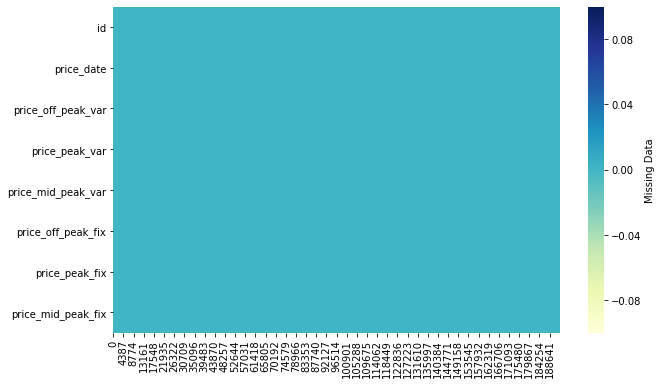

In [14]:
#heatmap showing missing value for price_df
plt.figure(figsize=(10,6))
sns.heatmap(price_df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=150)


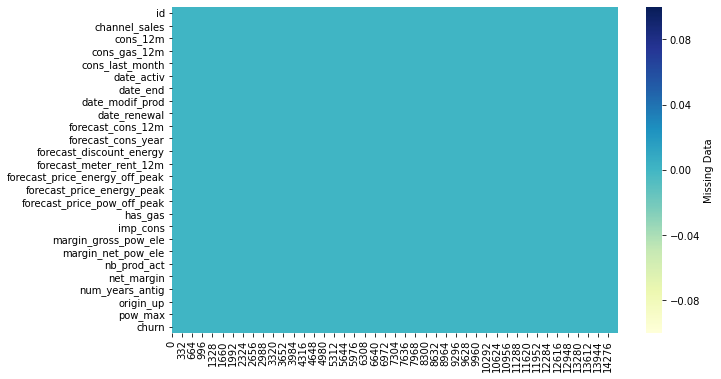

In [15]:
#heatmap showing missing value for client_df
plt.figure(figsize=(10,6))
sns.heatmap(client_df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=150)


conclusion

there is no null value in both data sets


## data exploaration


In [16]:
# how many number of customers have churned ?
att_count = client_df['churn'].value_counts()
print('Total Number of Churned Customers:\n', att_count)

Total Number of Churned Customers:
 Stayed     13187
Churned     1419
Name: churn, dtype: int64


In [17]:
# What is the proportion of customer attrition ?
att_rate =client_df['churn'].value_counts() / client_df.shape[0] * 100
print('Attrition rate: \n', att_rate)

Attrition rate: 
 Stayed     90.284814
Churned     9.715186
Name: churn, dtype: float64


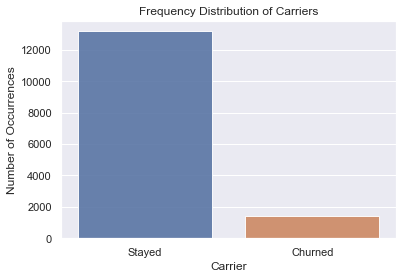

In [18]:
carrier_count = client_df['churn'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

Text(0.5, 1.0, 'proportion of customer attrition')

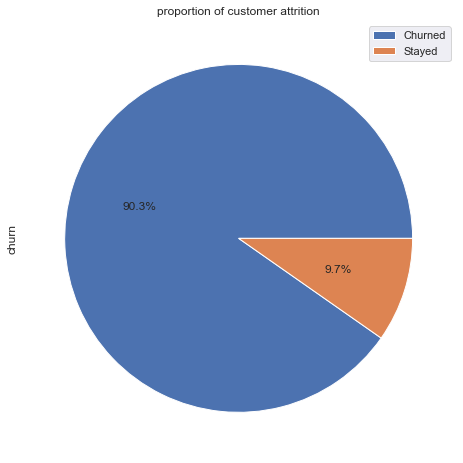

In [19]:
client_df['churn'].value_counts().plot(kind='pie',figsize=(14, 8),autopct='%1.1f%%',labels=None)
plt.legend(labels=(client_df["churn"])) # labels 
plt.title("proportion of customer attrition") 

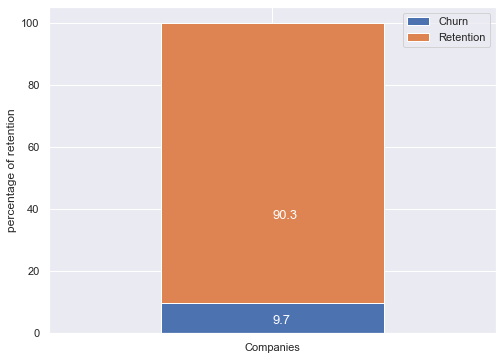

In [62]:
churn=client_df[['id','churn']]
churn.columns=['Companies','churn']
churn_total=churn.groupby(churn['churn']).count()
churn_percentage=churn_total/churn_total.sum()*100
ax=churn_percentage.transpose().plot(kind='bar',stacked=True,figsize=(8,6),rot=0)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value,((p.get_x()+p.get_width()/2)*0.5,p.get_y()+p.get_height()/2*0.6),
               color='white',size=(13))
plt.legend(['Churn','Retention'],loc="upper right")
plt.ylabel("percentage of retention");

key finding of retention
In the last 3 months 1419 customers have churned, 
There are currently 13187 active clients,
Customer retention is 90.28% in the last 3 months,
Customer attrition is 19.71% in the last 3 months,

In [20]:
client_df["origin_up"].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [21]:
client_df["origin_up"].unique()

array(['lxidpiddsbxsbosboudacockeimpuepw',
       'kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'ldkssxwpmemidmecebumciepifcamkci', 'MISSING',
       'usapbepcfoloekilkwsdiboslwaxobdp',
       'ewxeelcelemmiwuafmddpobolfuxioce'], dtype=object)

In [22]:
print(client_df["net_margin"].groupby(client_df['origin_up']).agg('sum').sort_values(ascending=False))

origin_up
lxidpiddsbxsbosboudacockeimpuepw    1461977.57
kamkkxfxxuwbdslkwifmmcsiusiuosws     664274.11
ldkssxwpmemidmecebumciepifcamkci     620281.40
MISSING                               17567.91
usapbepcfoloekilkwsdiboslwaxobdp        250.40
ewxeelcelemmiwuafmddpobolfuxioce         46.22
Name: net_margin, dtype: float64


The most popular electricity campaign is lxidpiddsbxsbosboudacockeimpuepw which has brought 7097 current customers.
The electricity campaign attributable to the highest total net margin is lxidpiddsbxsbosboudacockeimpuepw. Netting $1461977.57.

In [23]:
#seperating the y value, churned and stayed

In [24]:
churned_df=client_df.loc[client_df["churn"]=="Churned"]

In [25]:
churned_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,Churned
5,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,...,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,Churned
6,7ab4bf4878d8f7661dfc20e9b8e18011,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,...,f,0.00,4.04,4.04,1,346.63,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,Churned
25,389bbbe70248fbeecdf9bb1bd0d1da04,foosdfpfkusacimwkcsosbicdxkicaua,3584,0,322,2010-11-17,2016-11-17,2010-11-17,2015-11-18,379.83,...,f,32.61,57.72,57.72,1,38.76,5,lxidpiddsbxsbosboudacockeimpuepw,23.100,Churned
30,44e826a55734d0ca5eeafcae0e991a75,foosdfpfkusacimwkcsosbicdxkicaua,324,0,0,2009-07-07,2016-07-07,2015-05-23,2015-07-09,8.32,...,f,0.00,18.62,18.62,2,1.27,7,ldkssxwpmemidmecebumciepifcamkci,13.200,Churned


In [26]:
stayed_df=client_df.loc[client_df["churn"]=="Stayed"]
stayed_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,Stayed
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,Stayed
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,Stayed
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,Stayed
7,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,2015-04-22,864.73,...,f,70.63,53.92,53.92,1,100.09,6,lxidpiddsbxsbosboudacockeimpuepw,26.400,Stayed


## net_margin for stay and churn customer in electric campaign

In [27]:
print(churned_df["net_margin"].groupby(churned_df['origin_up']).agg('sum').sort_values(ascending=False))

origin_up
lxidpiddsbxsbosboudacockeimpuepw    231224.56
ldkssxwpmemidmecebumciepifcamkci     55329.97
kamkkxfxxuwbdslkwifmmcsiusiuosws     36309.15
MISSING                               1181.91
Name: net_margin, dtype: float64


In [28]:
print(stayed_df["net_margin"].groupby(stayed_df['origin_up']).agg('sum').sort_values(ascending=False))

origin_up
lxidpiddsbxsbosboudacockeimpuepw    1230753.01
kamkkxfxxuwbdslkwifmmcsiusiuosws     627964.96
ldkssxwpmemidmecebumciepifcamkci     564951.43
MISSING                               16386.00
usapbepcfoloekilkwsdiboslwaxobdp        250.40
ewxeelcelemmiwuafmddpobolfuxioce         46.22
Name: net_margin, dtype: float64


 the above output showing the net margin for person who got churn and stay. and count of person in each orign_up column

## TOTAL count of churn and stay customer in electricity campaign the customer first subscribed to

In [43]:
total_churn =churned_df.groupby(["origin_up"]).agg ({
     
    "origin_up" : "count"})

print(total_churn)


                                  origin_up
origin_up                                  
MISSING                                   4
kamkkxfxxuwbdslkwifmmcsiusiuosws        258
ldkssxwpmemidmecebumciepifcamkci        264
lxidpiddsbxsbosboudacockeimpuepw        893


In [44]:
total_stayed =stayed_df.groupby(["origin_up"]).agg ({
     
    "origin_up" : "count"})

print(total_stayed)


                                  origin_up
origin_up                                  
MISSING                                  60
ewxeelcelemmiwuafmddpobolfuxioce          1
kamkkxfxxuwbdslkwifmmcsiusiuosws       4036
ldkssxwpmemidmecebumciepifcamkci       2884
lxidpiddsbxsbosboudacockeimpuepw       6204
usapbepcfoloekilkwsdiboslwaxobdp          2


## merging two data

In [47]:
# Merge churn column with price_df dataset
client= price_df.merge(right= client_df,on=['id'])
client.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,channel_sales,cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,Stayed
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,Stayed
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,Stayed
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,Stayed
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,Stayed


In [48]:
client.shape

(175149, 33)

In [49]:
client.isnull().sum()

id                                0
price_date                        0
price_off_peak_var                0
price_peak_var                    0
price_mid_peak_var                0
price_off_peak_fix                0
price_peak_fix                    0
price_mid_peak_fix                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                 

In [50]:
pd.DataFrame({"Data Type":client.dtypes})

,Data Type
id,object
price_date,object
price_off_peak_var,float64
price_peak_var,float64
price_mid_peak_var,float64
price_off_peak_fix,float64
price_peak_fix,float64
price_mid_peak_fix,float64
channel_sales,object
cons_12m,int64


## finding the percentage of churn and stay in sales channel 

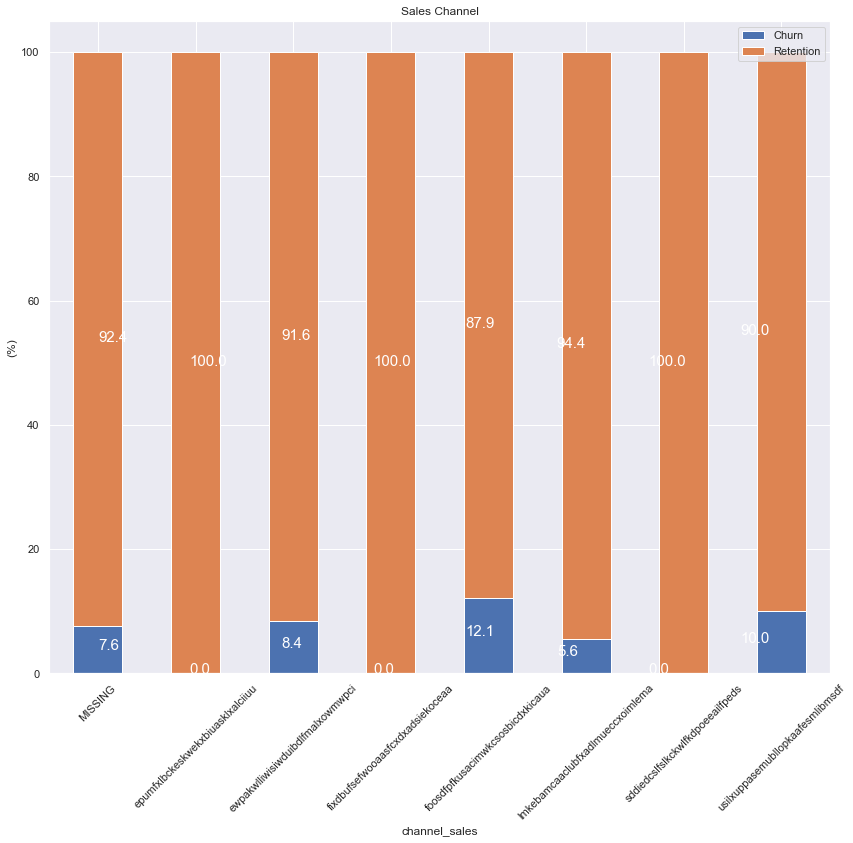

In [78]:
channel=client[['id','channel_sales','churn']]
channel=channel.groupby([channel['channel_sales'],channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn=(channel.div(channel.sum(axis=1),axis=0)*100)
ax=channel_churn.plot(kind='bar',stacked=True,figsize=(14,12),rot=45)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value,((p.get_x()+p.get_width()/2)*0.94,p.get_y()+p.get_height()/2*0.99),
               color='white',size=(15))
plt.title('Sales Channel')
plt.legend(['Churn','Retention'],loc="upper right")
plt.ylabel("(%)");

## finding the percentage of stay and churn in gas client

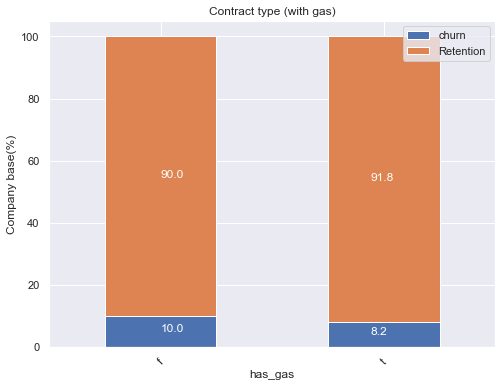

In [91]:
contract_type=client[['id','has_gas','churn']]
contract=contract_type.groupby([contract_type['churn'],
                               contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage=(contract.div(contract.sum(axis=1),axis=0)*100)
ax=contract_percentage.plot(kind='bar',stacked=True,figsize=(8,6),rot=45)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value,((p.get_x()+p.get_width()/2)*0.94,p.get_y()+p.get_height()/2*0.99),
               color='white',size=(12))
plt.title('Contract type (with gas)')
plt.legend(['churn','Retention'],loc="upper right")
plt.ylabel("Company base(%)");

## percentage in active product and services

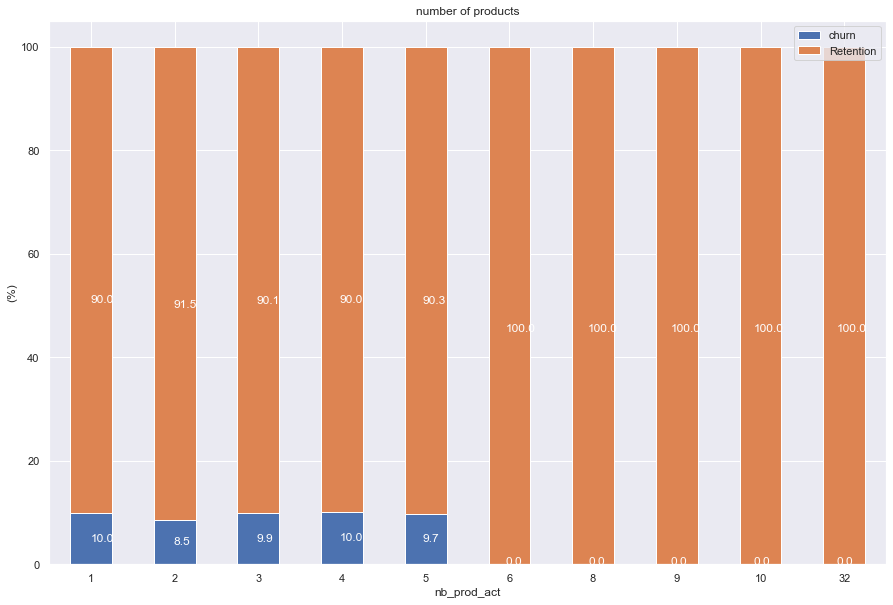

In [95]:
#Last id for others variables
others=client[['id','nb_prod_act','num_years_antig','origin_up','churn']]
products=others.groupby([others['nb_prod_act'],others['churn']])['id'].count().unstack(level=1)
products_percentage=(products.div(products.sum(axis=1),axis=0)*100)            
ax=products_percentage.plot(kind='bar',stacked=True,figsize=(15,10),rot=0)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value,((p.get_x()+p.get_width()/2)*0.99,p.get_y()+p.get_height()/2*0.9),
               color='white',size=(12))
plt.title('number of products')
plt.legend(['churn','Retention'],loc="upper right")
plt.ylabel("(%)");

## saving file in csv

In [97]:
client.to_csv('client.csv', index = False)
